In [25]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

from my_functions import show_multiple_img



In [4]:
dig = load_digits()

In [5]:
dig.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
print(dig.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

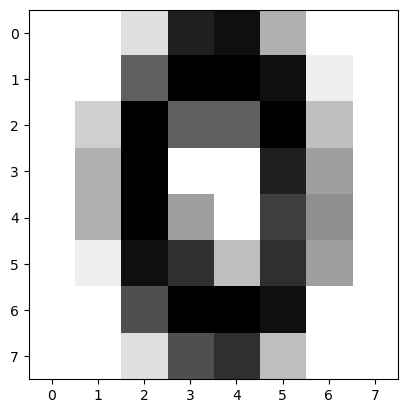

In [22]:
plt.imshow(dig.images[55], cmap="gray_r")   #plt.cm.gray_r



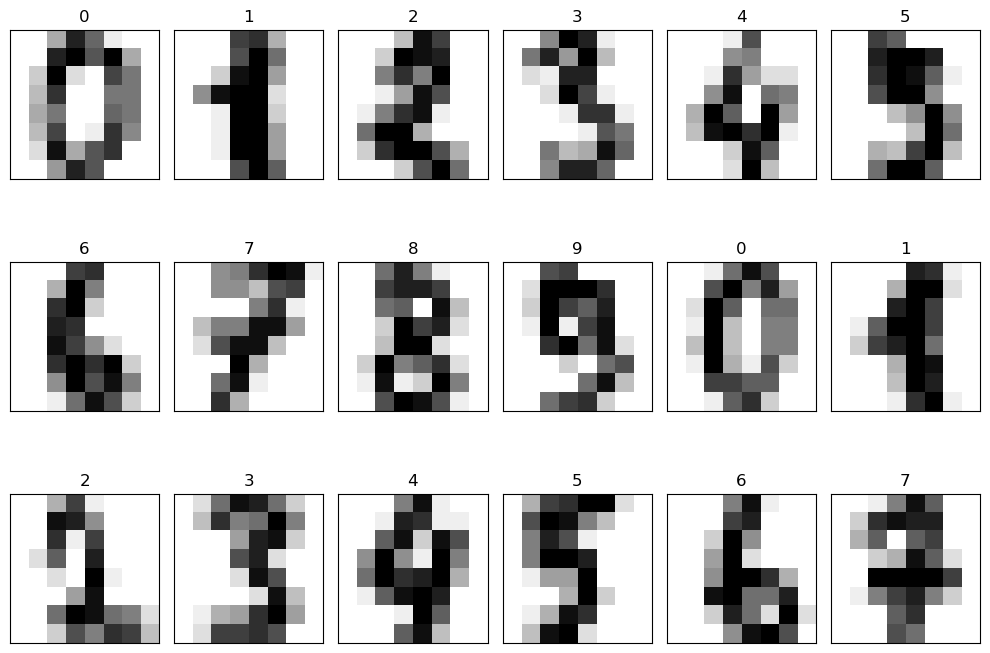

In [30]:
show_multiple_img(dig.images[0:18], dig.target[0:18])

In [31]:
dig.data[0] # Struttura pronta per algoritmo

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [32]:
dig.images[0] # Struttura pronta per visualizzare le immagini

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [40]:
dig.images[0].reshape([1,-1])[0] 

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [45]:
dig_df = pd.DataFrame(dig.data, columns=dig.feature_names) 
dig_df


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [47]:
dig_df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [48]:
dig_df.shape

(1797, 64)

In [49]:
dig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [74]:
dig_df.isnull().sum().sum()

0

In [57]:
target_df = pd.DataFrame(dig.target)

In [59]:
target_df.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [69]:
pd.set_option('display.max_row', None)
dig_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.303840,0.907192,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.204786,4.754826,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.835838,4.248842,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.848080,4.287388,0.0,10.0,13.0,15.0,16.0
pixel_0_5,1797.0,5.781859,5.666418,0.0,0.0,4.0,11.0,16.0
pixel_0_6,1797.0,1.362270,3.325775,0.0,0.0,0.0,0.0,16.0
pixel_0_7,1797.0,0.129661,1.037383,0.0,0.0,0.0,0.0,15.0
pixel_1_0,1797.0,0.005565,0.094222,0.0,0.0,0.0,0.0,2.0
pixel_1_1,1797.0,1.993879,3.196160,0.0,0.0,0.0,3.0,16.0


In [70]:
dig_df.dtypes

pixel_0_0    float64
pixel_0_1    float64
pixel_0_2    float64
pixel_0_3    float64
pixel_0_4    float64
pixel_0_5    float64
pixel_0_6    float64
pixel_0_7    float64
pixel_1_0    float64
pixel_1_1    float64
pixel_1_2    float64
pixel_1_3    float64
pixel_1_4    float64
pixel_1_5    float64
pixel_1_6    float64
pixel_1_7    float64
pixel_2_0    float64
pixel_2_1    float64
pixel_2_2    float64
pixel_2_3    float64
pixel_2_4    float64
pixel_2_5    float64
pixel_2_6    float64
pixel_2_7    float64
pixel_3_0    float64
pixel_3_1    float64
pixel_3_2    float64
pixel_3_3    float64
pixel_3_4    float64
pixel_3_5    float64
pixel_3_6    float64
pixel_3_7    float64
pixel_4_0    float64
pixel_4_1    float64
pixel_4_2    float64
pixel_4_3    float64
pixel_4_4    float64
pixel_4_5    float64
pixel_4_6    float64
pixel_4_7    float64
pixel_5_0    float64
pixel_5_1    float64
pixel_5_2    float64
pixel_5_3    float64
pixel_5_4    float64
pixel_5_5    float64
pixel_5_6    float64
pixel_5_7    

In [72]:
pd.set_option('display.max_row', 20)
dig_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [75]:
# Train Test Split

from sklearn.model_selection import train_test_split

SEED = 42 # Definisco una variabile Seed che usero' quando mi servira'ArithmeticError





In [76]:
X = dig_df          # X = dig.data  
y = target_df       # y = dig.target


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=SEED)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347, 1), (450, 1))

In [79]:
X_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
678,0.0,0.0,2.0,15.0,15.0,16.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,15.0,7.0,0.0,0.0,0.0
1469,0.0,5.0,16.0,15.0,3.0,0.0,0.0,0.0,0.0,11.0,...,10.0,0.0,0.0,5.0,16.0,14.0,8.0,6.0,1.0,0.0
266,0.0,0.0,4.0,13.0,8.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,7.0,15.0,11.0,2.0,0.0,0.0
148,0.0,0.0,3.0,13.0,13.0,3.0,0.0,0.0,0.0,2.0,...,7.0,0.0,0.0,0.0,3.0,13.0,16.0,10.0,1.0,0.0
1476,0.0,0.0,3.0,13.0,16.0,16.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,15.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,1.0,13.0,16.0,16.0,12.0,1.0,0.0,0.0,12.0,...,9.0,0.0,0.0,1.0,14.0,16.0,16.0,11.0,1.0,0.0
1294,0.0,3.0,15.0,16.0,15.0,3.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,3.0,16.0,5.0,0.0,0.0,0.0,0.0
860,0.0,0.0,9.0,16.0,16.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9.0,14.0,16.0,16.0,2.0,0.0
1459,0.0,0.0,1.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,15.0,7.0,0.0,0.0,0.0


In [81]:
np.array(X_train)

array([[ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  5., 16., ...,  6.,  1.,  0.],
       [ 0.,  0.,  4., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

,0
678,5
1469,2
266,0
148,8
1476,7


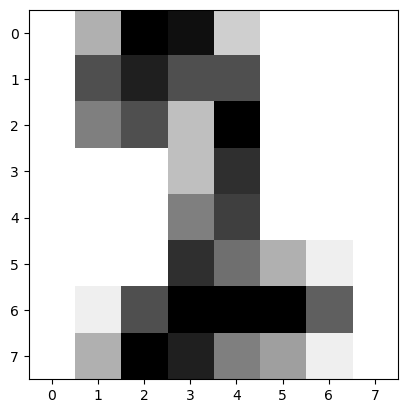

In [87]:
plt.imshow(np.array(X_train)[1].reshape(8,8), cmap="gray_r")
y_train.head(5)